<img style="float:right; max-width:400px" src="imgs/visestruka.png" width="60%" />

# Višestruka linearna regresija

Do sada smo koristili jednostruku (jednostavnu) linearnu regresiju, gde postoji samo jedna nezavisna promenljiva $x$. 
*Višestruka* linearna regresija se odnosni na linearnu regresiju sa *više* nezavisnih promenljivih $x_1, x_2,...x_n$.
Primer višestruke linearne regresije: $y = 2.7 x_1 + 3.4 x_2 + 5$.

U nastavku prikazujemo:
- primer [višestruke linearne regresije](#primer-višestruke-regresije),
- dodatnu [pretpostavka o savršenoj kolinearnosti](#kolinearnost),
- proveru linearnosti pomoću [t-testa](#t-test) i [f-testa](#f-test),
- kako [evaluiramo model](#evaluacija-modela).


Učitavamo neophodne pakete i skup podataka:

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

matplotlib.rcParams['figure.figsize'] = (8, 4)
sb.set(font_scale=1.)

In [2]:
df = pd.read_csv('data/housing.csv', sep=',')
df.head()

,price,lotsize(m^2),bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,74700,658.4799,3,1,1,1,1,1,0,0,2,1
1,85000,652.4388,3,1,1,1,0,1,0,1,2,1
2,68500,650.5800,3,1,2,1,0,1,0,0,0,0
3,82900,650.5800,3,1,1,1,0,1,0,0,2,1
4,86000,641.2860,3,2,1,1,1,1,0,0,0,1


## Primer višestruke linearne regresije
Do sad smo pravili model koji predviđa cenu kuće $Y$ na osnovu površine placa $X$. Sada uvodimo dodatnu nezavisnu promenljivu i pravimo model višestruke linearne regresije koji predviđa cenu kuće $Y$ na osnovu površine placa $X_1$ i broja spavaćih soba $X_2$.

In [3]:
import pandas as pd
import statsmodels.api as sm

df = pd.read_csv('data/housing.csv', sep=',')

col_names = ['lotsize(m^2)', 'bedrooms']
x = df[col_names]
y = df['price']

x_with_const = sm.add_constant(x)
model = sm.OLS(y, x_with_const).fit()
y_pred = model.predict(x_with_const)
intercept, slope0, slope1 = model.params

print(f'y = {slope0:.2f} x1 + {slope1:.2f} x2 + {intercept:.2f}')

y = 78.02 x1 + 2546.39 x2 + 22835.34


Pravimo model gde koristimo sve nezavisne promenljive, tako što pozovemo `x = df.drop(columns=['price'])` kako bi učitali sve nezavisne promenljive koje su nam na raspolaganju.

In [4]:
x = df.drop(columns=['price'])
y = df['price']

x_with_const = sm.add_constant(x)
all_vars_model = sm.OLS(y, x_with_const).fit()

## Kolinearnost
Pored L.I.N.E. pretpostavki, u višestrukoj regresiji moramo da zadovoljimo još jednu pretpostavku da: **ne postoji savršena kolinearnost između 2 ili više nezavisnih promenljivih**.

*Savršena kolinearnost između dve promenljive $x_1$ i $x_2$ postoji kada su povezane linearnom funkcijom: $x_2 = a x_1 + b$.*

Primer: recimo da u podacima postoji još jedna kolona koja se zove `toilet` (kopija kolone `bathrms`). Ta promenljiva je u linearnoj relaciji sa promenljivom `bathrms`, tako što je $x_2 = 1 x_1 + 0$. U ovom slučaju postoji savršena kolinearnost i treba izbaciti tu kolonu `toilet` zbog koje nastaje savršena kolinearnost.

*Napomena: posmatraćemo savršenu kolinearnost između tačno 2 promenljive.*

In [5]:
# duboka kopija DataFrame objekta
df_perfect_collinearity = df.copy() 
df_perfect_collinearity['toilet'] = df_perfect_collinearity['bathrms']
df_perfect_collinearity.head()

,price,lotsize(m^2),bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea,toilet
0,74700,658.4799,3,1,1,1,1,1,0,0,2,1,1
1,85000,652.4388,3,1,1,1,0,1,0,1,2,1,1
2,68500,650.5800,3,1,2,1,0,1,0,0,0,0,1
3,82900,650.5800,3,1,1,1,0,1,0,0,2,1,1
4,86000,641.2860,3,2,1,1,1,1,0,0,0,1,2


Kako da uočiomo kolinearnost? - preko **matrice korelacije**.

Kolinearnost i korelacija su dva slična pojma. **Korelacija** se odnosi na linearnu vezu dve promenljive, a **kolinearnost** se odnosi na linearnu vezu dve *nezavisne* promenljive u *linearnoj regresiji*.

**Kovarijansa** - **koeficijent korelacije** - konkretan broj u rasponu $[-1,1]$ koji meri linearnost između promenljivih. Vrednost $-1$ znači savršena negativna kolinearnost, a $+1$ savršena pozitivna kolinearnost. Jaka korelacija (ne savršena) - vrednosti u intervalu $(-1, -0.8] \cup [0.8, 1)$. 

Matrica korelacija pokazuje vrednosti koeficijenata korelacije za sve parove promenljivih.
- Ako matrica korelacija pokaže savršenu pozitivnu ili negativnu kolinearnost ($+1$ ili $-1$) između nezavisnih promenljivih (u našem primeru za kolonu `toilet`), onda tu kolonu treba ukloniti.
- Ako matrica korelacija pokaže jaku korelaciju za nezavisne promenljive, tada pretpostavka o kolinearnosti nije narušena. *Savet*: kada se uoči jaka korelacija između nezavisnih promenljivih, vredi ispitati model bez tih promenljivih jer će se možda dobiti bolje performanse, ali nema garancije.
- Ostale korelacije (makar one bile jake) nisu problematične.

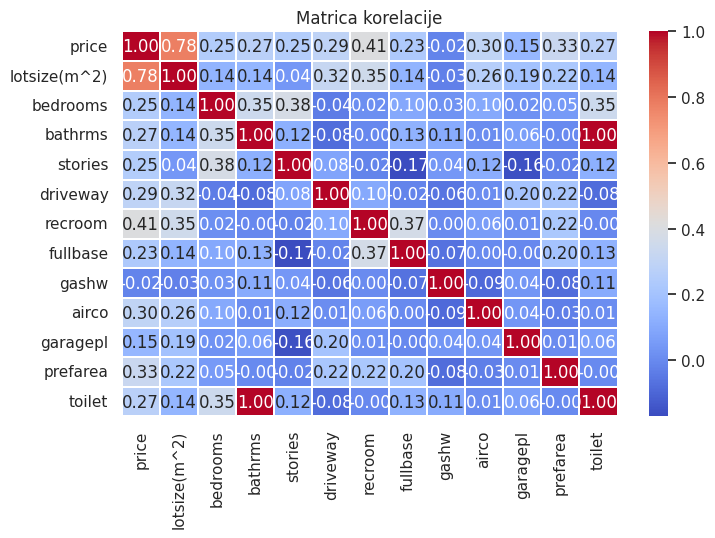

In [6]:
plt.figure(figsize=(8,5)) # da podesimo velicinu grafika

correlation_matrix = df_perfect_collinearity.corr() # racunamo matricu korelacije

sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.1)
plt.title('Matrica korelacije')
plt.show()

Vidimo da je vestački napravljena kolona `toilet` u savršenoj kolinearnosti sa `bathrms`, pa nju treba ukloniti.


## T-test
U jednostrukoj regresiji, linearnost smo testirali vizualno preko grafika ili koresteći **t-test**.
T-test se koristi i u višestrukoj regresiji, i računa se za svaku promenljivu posebno.
U višestrukoj regresiji, t-test proverava značaj pojedinačnih promenljivih **u prisustvu ostalih promenljivih**.
Za svaku promenljivu zasebno testiramo da li je u linearnoj vezi sa $Y$, ali u prisustvu ostalih promenljivih.

Može se ispostaviti da neka promenljiva nije značajna kada model ima pristup drugim promenljivim. Ova situacija se javlja kada su dve promenljive u korelaciji (npr. `toilet` i `bathrms` ili kao `bedrooms` i `stories`).

Primer gde poredimo 2 modela:
1. model jednostruke regresije koji predviđa cenu $Y$ na osnovu broja soba $X$. Vidimo da je  `p-vrednost ≤ 0.05` za promenljivu `bedrooms` => 95% smo sigurni da veza jeste linearna ✅.
2. model višestruke regresije koji predviđa cenu $Y$ na osnovu svih promenljivih. Vidimo da je `p-vrednost > 0.05` za promenljivu `bedrooms` => ne mozemo zaključiti linearnost, jer t-test nije validan. Zaključujemo da promenljiva `bedrooms` nema veliki uticaj u prisustvu ostalih promenljivih. 

*Napomena:* kada je `p-vrednost > 0.05` za neku nezavisnu promenljivu, verovatno možemo dobiti bolji model izbacivanjem te promenljive.

*Podsetnik: da vidimo p-vrednost čitamo kolonu `P>|t|` za svaku promenljivu.*

In [7]:
# pomocna funkcija koja vraca fitovan model
def get_fitted_model(x, y):
    x_with_const = sm.add_constant(x)
    model = sm.OLS(y, x_with_const).fit()
    return model

bedrooms_model = get_fitted_model(x=df['bedrooms'], y=df['price'])
all_vars_model = get_fitted_model(x=df.drop(columns=['price']), y=df['price'])

print(bedrooms_model.summary())
print(all_vars_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     18.43
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           2.44e-05
Time:                        18:22:07   Log-Likelihood:                -3034.6
No. Observations:                 280   AIC:                             6073.
Df Residuals:                     278   BIC:                             6080.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.853e+04   3069.052     15.813      0.0

## F-test
F-test provera da li je bar jedna nezavisna promenljiva u linearnoj vezi sa $Y$.
F-test je jednostavniji od t-testa jer ne testira linearnost u prisustvu ostalih promenljivih kao što to t-test radi.

Slično kao kod t-testa gde postoji p-vrednost, tako postoji i p-vrednost kod F-testa. Ako je p-vrednost mala, onda F-vrednost nije česta i bar jedna promenljiva $X$ ima linearnu vezu sa promenljivom $Y$.

**Šta je *mala* p-vrednost?**

Kao prag se obično uzima vrednost $\alpha = 0.05 = 5\%$ (eng. *significance level*).
Ako je konkretna `p-vrednost ≤ 0.05`, tada smo 95% sigurni da bar jedna promenljiva $X$ ima linearnu vezu sa promenljivom $Y$ ✅.

Vrednosti čitamo iz `statsmodels` tabele pozivom metode `summary()`: F-vrednost je obelezena sa `F-statistic`, dok je p-vrednost je obelezena sa `Prob (F-statistic)`.

U konkretnom primeru vidimo da je p-vrednost F-testa mala i zaključujemo da bar jedna promenljiva $X$ ima linearnu vezu sa promenljivom $Y$. ✅.

Da dobijemo konretnu p-vrednost:

In [8]:
alpha = 0.05
if all_vars_model.f_pvalue <= alpha:
    print('bar jedna promenljiva X ima linearnu zavisnost sa promenljivom Y')
else:
    print('moguce je da ni jedna promenljiva nema znacajnu linearnu zavisnost sa Y')

bar jedna promenljiva X ima linearnu zavisnost sa promenljivom Y


## Evaluacija modela

Kako da znamo koji model je bolji: model sa jednom promenljivom, sa dve, ili više promenljivih?
Pretpostavljamo da što bolje opisemo kuću (što više znamo o nekoj kući) bolje ćemo prediktovati cenu kuće, ali nismo sigurni da je ovo uvek tačno. Zato nam treba način da izmerimo koliko je neki model dobar.

Koeficijent determinacije - $r^2$ - je način da izmerimo kvalitet modela. Uzima vrednosti u opsegu $[0, 1]$. Što je $r^2$ bliže 1, to je model bolji; što je dalje od 1, to je model gori.

Poredimo $r^2$ na primeru dva modela: prvi predviđa cenu na osnovu površine placa, a drugi na osnovu broja soba.

In [9]:
# predikcija cene na osnovu povrsine placa
lotsize_model = get_fitted_model(x=df['lotsize(m^2)'], y=df['price'])
print(f'r^2 = {lotsize_model.rsquared:.3f} za lotsize model')

# predikcija cene na osnovu broja soba
bedrooms_model = get_fitted_model(x=df['bedrooms'], y=df['price'])
print(f'r^2 = {bedrooms_model.rsquared:.3f} za bedrooms model')

r^2 = 0.608 za lotsize model
r^2 = 0.062 za bedrooms model


Vidimo da je $r^2$ veći za `lotsize` model, sto znači da površina placa bolje opisuje cenu kuće, nego broj soba.

### Prilagođeni $r^2$
Kada dodajemo nezavisne promenljive u model, pravilo je da vrednost $r^2$ nikada ne opada. Pošto $r^2$ ne opada, mogli bismo zaključiti da je uvek dobro dodati nezavisnu promenljivu u model ➡️ Ovaj zaključak je pogrešan! ❌

Nova nezavisna promenljiva koju dodajemo u model može biti od pomoći, ali isto tako može biti beskorisna ili sadržati pogrešne vrednosti. Uvođenjem *loše* nezavisne promenljive se smanjuje kvalitet modela, a $r^2$ mera to neće pokazati (jer se nikada ne smanjuje).

Zato ćemo za višestruku regresiju koristiti **prilagođeni $r^2$** ✅. Prilagođeni $r^2$ je modifikacija $r^2$ mere koja uzima u obzir kompleksnost modela i broj podataka. Pouzdan je pokazatelj kvaliteta modela.

Poredimo $r^2$ i prilagođeni $r^2$ na primeru dva modela: prvi previđa cenu na osnovu svih nezavisnih promenljivih, a drugi na osnovu nekih (u drugom modelu izbacićemo `gashw` - gas za grejanje vode i `bedrooms` - broj soba).

In [10]:
# predikcija cene na osnovu svih nezavisnih promenljivih
all_vars_model = get_fitted_model(x=df.drop(columns=['price']), y=df['price'])
print(f'r^2 = {all_vars_model.rsquared:.5f} i prilagodjeni r^2 = {all_vars_model.rsquared_adj:.5f}')

# predikcija cene na osnovu  nekih promenljivih 
some_vars_model = get_fitted_model(x=df.drop(columns=['price', 'gashw', 'bedrooms']), y=df['price'])
print(f'r^2 = {some_vars_model.rsquared:.5f} i prilagodjeni r^2 = {some_vars_model.rsquared_adj:.5f}')

r^2 = 0.74184 i prilagodjeni r^2 = 0.73125
r^2 = 0.74183 i prilagodjeni r^2 = 0.73323


*Koji model je bolji: `all_vars_model` ili `model2`?*

Kada bismo gledali samo $r^2$ meru, zaključili bismo da je `all_vars_model` bolji model jer ima veću $r^2$ vrednost. Ovo je pogrešan zaključak! ❌

Ispravno je da gledamo prilagođeni $r^2$ meru i zaključimo da je `filtered_vars_model` bolji model, jer ima veću vrednost za prilagođeni $r^2$ ✅.

### Train/val/test

Evaluacija modela sa *train/val/test* podelom podataka podrazumeva razdvajanje dostupnih podataka na trening, validacioni i test skup. Najčešće se podaci dele u odnosu: $80/20/20$. Nekad je drugačiji odnos bolji, a to zavisi od količine podataka i problema koji se rešava.

**Trening skup** - 
Model se trenira na trening skupu. Treniranje modela podrazumeva traženje parametara modela kako bi minimizovao gresku. U našem slučaju parametri modela su koeficijenti uz nezavisne promenljive $x_1, x_2,...x_n$.

**Validacioni skup** -
Validacioni skup je odvojen skup podataka koje model nije video (nisu u trening skupu). Ove podatke model *ne vidi* u toku treninga. 
Nad podacima iz validacionog skupa merimo performanse modela nekom metrikom (npr. prilagođeni $r^2$, SSE, ...). Performanse nam govore koliko model dobro generalizuje nad podacima koje model nije video do sad.

Primer: validacioni skup služi da pogledamo $r^2$ meru nad kućama koje model do sad nije video (metrika se računa nad validacionim skupom). Kada dobijemo neku meru, ta mera govori koliko dobro trenirani model generalizuje nad novim podacima. Zatim možemo da probamo da dodamo ili izbacimo neku kolonu i gledamo kako će se mera promeniti. Iterativno dobijamo model koji najbolje generalizuje.

**Test skup** -
Test skup služi da evaluira model nad nepoznatim podacima. Test skup ocenjuje moć generalizacije modela nad novim podacima. Slično kao i validacini skup, sa razlikom da test skup evaluiramo *samo jednom*, u slučaju da uopšte imamo pristup test skupu. Često nemamo pristup test skupu nego će to biti podaci koje dobijamo u realnom vremenu nad kojima trenirani model prediktuje.

Primer:

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

x = df.drop(columns=['price'])
y = df['price']

# podela na trening i validacioni skup
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.8, shuffle=True, random_state=42)

# treniramo model sa trening podacima
all_vars_model = get_fitted_model(x=x_train, y=y_train)

# prediktujemo nad podacima iz validacionog skupa
x_with_const = sm.add_constant(x_val)
y_pred = all_vars_model.predict(x_with_const)

# računamo metriku r^2 ali nad validacionim skupom
rsquared_val_data = r2_score(y_true=y_val, y_pred=y_pred)

print(f'{rsquared_val_data:.2f}')

0.67


*Napomena: $r^2$ i prilagođeni $r^2$ nisu uvek najbolje metrike za perfromanse modela. Nekad je bolje koristiti SSE, MSE ili RMSE metrike.*

## Zadaci
**TODO 1:** Napraviti regresioni model koji predviđa cenu kuće koresteći `statsmodels` paket i sve atribute. 
Napraviti funkciju `def are_assumptions_satisfied(model, x, y, p_value_thresh=0.01):` koja provera da li su sve pretpostavke zadovoljene. Testirati pretpostavke nad trening skupom. 

**TODO 2:** Iskoristiti regresioni model iz **TODO 1** i proveri da li svaka promenljiva zadovoljava t-test. Uz pomoć dobijenih rezultata t-testa, unaprediti trenutni model uklanjanjem odgovarajućih atributa, tako da se dobije najbolja mera nad validacionim skupom. Model mora da zadovolji pretpostavke regresije (iskoristi metodu `are_assumptions_satisfied` iz **TODO 1**).

**TODO 3:** Koliku meru nad test podacima iz Evrope [data/skincancer_europe.csv](data/skincancer_europe.csv) ostvaruje najbolji model višestuke linearne regresije treniran nad podacima iz Amerike [data/skincancer.csv](data/skincancer.csv)? Za trening podatke uzeti 80% dostupnih podataka.

*Napomena: za trening podatke uzeti 90% dostupnih podataka. Za granicu p-vrednosti u svim pretpostavkama uzeti vrednost 0.01. Kao meru uzeti prilagodjeni $r^2$.*